In [1]:
# TESSSSSSSSSSSSSSSSSSSSSSSSSSSSsss
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
from HSI_class import HSI

# Check if GPU is available
print("Windows GPU Available:", torch.cuda.is_available())

# If available, print the GPU name
if torch.cuda.is_available():
    print("GPU Name:", torch.cuda.get_device_name(0))

Windows GPU Available: True
GPU Name: NVIDIA GeForce GTX 1650


In [6]:
dataset_path = "Hyperspectral oil spill detection datasets"

dataset = []

i = 0
for filename in os.listdir(dataset_path):
    if i > 1:
        break
    file_path = os.path.join(dataset_path, filename)
    if os.path.isfile(file_path):  # Check if it's a file
        print(f"Processing file: {file_path}")
        hsi = HSI(file_path)
        dataset.append(hsi)
    i += 1

Processing file: Hyperspectral oil spill detection datasets\GM01.mat
Processing file: Hyperspectral oil spill detection datasets\GM02.mat


In [7]:
for hsi in dataset:
    print(f'{hsi.name}: {hsi.img.shape}')

GM01: (1243, 684, 224)
GM02: (1786, 699, 224)


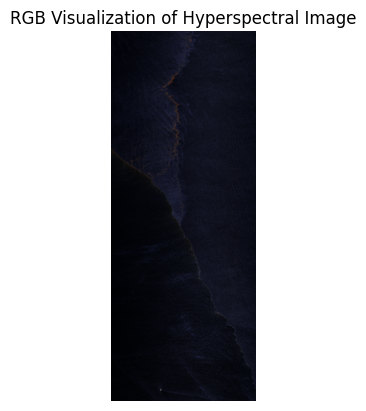

In [8]:
img = dataset[1].img
gt = dataset[1].gt
r_band = 31  # Red (around 660 nm) https://www.indexdatabase.de/db/s-single.php?id=28
g_band = 22  # Green (around 560 nm)
b_band = 10 # Blue (around 450 nm)

red_band = img[:, :, r_band]  # Adjust band index for red
green_band = img[:, :, g_band]  # Adjust band index for green
blue_band = img[:, :, b_band]  # Adjust band index for blue

# Normalize bands to range 0-1 for proper visualization
red_band = (red_band - np.min(red_band)) / (np.max(red_band) - np.min(red_band))
green_band = (green_band - np.min(green_band)) / (np.max(green_band) - np.min(green_band))
blue_band = (blue_band - np.min(blue_band)) / (np.max(blue_band) - np.min(blue_band))

rgb_image = np.stack((red_band, green_band, blue_band), axis=-1)

# Display the RGB image
plt.imshow(rgb_image)
plt.title("RGB Visualization of Hyperspectral Image")
plt.axis('off')
plt.show()

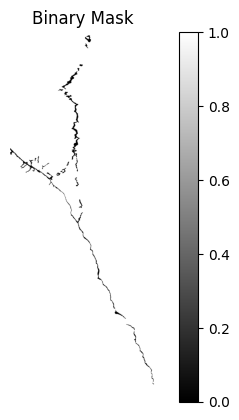

In [9]:
# Visualize the binary mask
plt.imshow(1 - gt, cmap='gray')  # Use 'gray' for binary visualization
plt.colorbar()
plt.title('Binary Mask')
plt.axis('off')
plt.show()

In [7]:
import createSample as CS
hsi_ = dataset[0]
patch_size = 9
sample_per_class = 500
selected_patch_0, selected_patch_1, random_indices_0, random_indices_1 = CS.createSample(hsi_, patch_size, sample_per_class)

hsi shape
(1243, 684, 224)
500 Randomly chosen 0 indices: [(np.int64(1185), np.int64(1)), (np.int64(330), np.int64(291)), (np.int64(157), np.int64(334)), (np.int64(635), np.int64(191)), (np.int64(472), np.int64(79)), (np.int64(647), np.int64(626)), (np.int64(946), np.int64(643)), (np.int64(1143), np.int64(681)), (np.int64(139), np.int64(656)), (np.int64(698), np.int64(576)), (np.int64(989), np.int64(170)), (np.int64(151), np.int64(682)), (np.int64(1202), np.int64(472)), (np.int64(1104), np.int64(66)), (np.int64(34), np.int64(605)), (np.int64(314), np.int64(30)), (np.int64(1242), np.int64(278)), (np.int64(944), np.int64(16)), (np.int64(299), np.int64(583)), (np.int64(1233), np.int64(392)), (np.int64(1210), np.int64(181)), (np.int64(828), np.int64(180)), (np.int64(1009), np.int64(251)), (np.int64(1127), np.int64(683)), (np.int64(472), np.int64(417)), (np.int64(623), np.int64(573)), (np.int64(59), np.int64(525)), (np.int64(172), np.int64(250)), (np.int64(900), np.int64(107)), (np.int64(58

In [8]:
i =399
half_patch = patch_size // 2
print(hsi_.img[random_indices_0[i][0]][random_indices_0[i][1]])
print(selected_patch_0[i][half_patch][half_patch])

print(hsi_.img[random_indices_1[i][0]][random_indices_1[i][1]])
print(selected_patch_1[i][half_patch][half_patch])

[-239 -339  348  410  450  594  655  659  646  606  581  537  484  453
  429  397  382  351  323  300  269  247  226  196  183  162  153  141
  131  129  122  114  115  109  102   89   77   72   57   29   46   54
   63   31   47   54   48   46   48   24   30   36   51   46   48   41
   41   24    6    3    5  -18 -161  -66    9   17   29   38   44   46
   47   41   49   42   45   38   32   29   13  -12 -236 -221 -105 -112
  -29    1   12    5   17   14   24   25   32   36   34   36   36   33
   32   20   24   17   18   19   26  -54    0    0    0    0    0    0
    0    0    2 -145  -23  -39    2  -46   -8   12   12   15   17   28
   30   23   22   25   21   26   21   29   28   23   29   21   23   34
   26   27   28   28   26   24   17    9    6   -1   -8  -12    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
  -96  -42  -11    0   -1  -18  -47   -2   13   10   13   12   21   24
   22   17   17   22   21   17   24   16   27   23   24   17   24   23
   23 

In [9]:
print(f"selected patch 0: {selected_patch_0.shape}")
print(f"selected patch 1: {selected_patch_1.shape}")

print(random_indices_0)
print(random_indices_1)

selected patch 0: (500, 9, 9, 224)
selected patch 1: (500, 9, 9, 224)
[(np.int64(1185), np.int64(1)), (np.int64(330), np.int64(291)), (np.int64(157), np.int64(334)), (np.int64(635), np.int64(191)), (np.int64(472), np.int64(79)), (np.int64(647), np.int64(626)), (np.int64(946), np.int64(643)), (np.int64(1143), np.int64(681)), (np.int64(139), np.int64(656)), (np.int64(698), np.int64(576)), (np.int64(989), np.int64(170)), (np.int64(151), np.int64(682)), (np.int64(1202), np.int64(472)), (np.int64(1104), np.int64(66)), (np.int64(34), np.int64(605)), (np.int64(314), np.int64(30)), (np.int64(1242), np.int64(278)), (np.int64(944), np.int64(16)), (np.int64(299), np.int64(583)), (np.int64(1233), np.int64(392)), (np.int64(1210), np.int64(181)), (np.int64(828), np.int64(180)), (np.int64(1009), np.int64(251)), (np.int64(1127), np.int64(683)), (np.int64(472), np.int64(417)), (np.int64(623), np.int64(573)), (np.int64(59), np.int64(525)), (np.int64(172), np.int64(250)), (np.int64(900), np.int64(107)), 

In [10]:
indices = random_indices_0 +  random_indices_1

# Concatenating along axis 0
x_train = np.concatenate((selected_patch_0, selected_patch_1), )

y_train = np.array([])

gt = hsi_.gt
for indice in indices:
    # print(gt[indice[0]][indice[1]])
    y_train = np.append(y_train, gt[indice[0]][indice[1]])

count = np.count_nonzero(y_train == 0)  # Count elements equal to 0
print(f'number of element equal 0 {count}')

count = np.count_nonzero(y_train == 1)  # Count elements equal to 1
print(f'number of element equal 1 {count}')


# print(y_train) 


# Print shape to verify
print(f"x_train shape: {x_train.shape}")  # Expected output: (10, 9, 9, 224)
print(f"y_train shape: {y_train.shape}") 


number of element equal 0 500
number of element equal 1 500
x_train shape: (1000, 9, 9, 224)
y_train shape: (1000,)


In [12]:
# Augmentation
import augmentation as aug

n_category = 2
band_size = 224
num_per_category = 500

# data_augment1, label_augment1 = aug.Augment_data(x_train, y_train, n_category, patch_size, band_size, num_per_category)

# data_augment2, label_augment2 = aug.Augment_data2(x_train, y_train, n_category, patch_size, band_size, num_per_category)

# print(f"hasil augmentasi 1 shape: {data_augment1.shape}")
# print(f"label augmentai 1 shape: {label_augment1.shape}")

# print(f"hasil augmentasi 2 shape: {data_augment2.shape}")
# print(f"label augmentasi 2 shape: {label_augment2.shape}")

# print(label_augment1)
# print(label_augment2)

# Count occurrences of each unique element
# counts1 = np.bincount(label_augment1)

# # Print results
# for i, count in enumerate(counts1):
#     print(f"Element {i} occurs {count} times.")

# counts2 = np.bincount(label_augment2)

# # Print results
# for i, count in enumerate(counts2):
#     print(f"Element {i} occurs {count} times.")

In [13]:
data_augment = x_train
label_augment = y_train
label_augment = label_augment.astype(int)

print(f"hasil augmentasi gabungan untuk training: {data_augment.shape}")
print(f"label augmentasi gabungan: {label_augment.shape}")

# print(label_augment)

# Count occurrences of each unique element
counts = np.bincount(label_augment.astype(int))

# Print results
for i, count in enumerate(counts):
    print(f"Element {i} occurs {count} times.")

hasil augmentasi gabungan untuk training: (1000, 9, 9, 224)
label augmentasi gabungan: (1000,)
Element 0 occurs 500 times.
Element 1 occurs 500 times.


In [14]:
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision.models import vgg16
import VGG as vgg

In [15]:
# Example usage
print("creating model...")
model = vgg.VGG16_HSI()
print("model created")

print(model)

creating model...


c:\Users\Asus TUF\Documents\code\TA\myenv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Asus TUF\Documents\code\TA\myenv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


model created
VGG16_HSI(
  (pre_conv): Sequential(
    (0): Conv2d(224, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): AdaptiveAvgPool2d(output_size=(1, 1))
  )
  (fc): Linear(in_features=256, out_features=200704, bias=True)
  (vgg): VGG(
    (features): Sequential(
      (0): ReLU(inplace=True)
      (1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): ReLU(inplace=True)
      (6): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (7): ReLU(

In [16]:
test = data_augment[0]
test = torch.tensor(test)
test = test.to(torch.float32)
test = test.unsqueeze(0)

input = test
input = input.permute(0, 3, 1, 2)

print(f"input shape: {input.shape}")

# Pass the input through the model
output = model(input)

# Print the output shape
print("Output Shape:", output.shape)

output_value = output.detach().numpy() 
print(f"output value: {output_value}")

input shape: torch.Size([1, 224, 9, 9])
Output Shape: torch.Size([1, 2])
output value: [[ 0.10963838 -0.10290075]]


In [17]:
from torch.utils.data import Dataset, DataLoader


X_train = data_augment
X_train = torch.tensor(X_train)
X_train = X_train.to(torch.float32)
X_train = X_train.permute(0, 3, 1, 2)
print(f"X_train shape: {X_train.shape}")

y_train = torch.tensor(label_augment)

print(f"y_train shape: {y_train.shape}")


X_train shape: torch.Size([1000, 224, 9, 9])
y_train shape: torch.Size([1000])


In [18]:
# Generate validation data
hsi_val = dataset[1]
patch_size = 9
sample_per_class = 100
selected_patch_0, selected_patch_1, random_indices_0, random_indices_1 = CS.createSample(hsi_val, patch_size, sample_per_class)


hsi shape
(1786, 699, 224)
100 Randomly chosen 0 indices: [(np.int64(1531), np.int64(304)), (np.int64(1559), np.int64(544)), (np.int64(992), np.int64(167)), (np.int64(1573), np.int64(81)), (np.int64(932), np.int64(297)), (np.int64(1348), np.int64(648)), (np.int64(1458), np.int64(260)), (np.int64(575), np.int64(681)), (np.int64(328), np.int64(622)), (np.int64(726), np.int64(648)), (np.int64(1381), np.int64(382)), (np.int64(851), np.int64(207)), (np.int64(596), np.int64(571)), (np.int64(477), np.int64(397)), (np.int64(1753), np.int64(351)), (np.int64(784), np.int64(434)), (np.int64(773), np.int64(137)), (np.int64(752), np.int64(440)), (np.int64(1285), np.int64(102)), (np.int64(171), np.int64(596)), (np.int64(45), np.int64(122)), (np.int64(422), np.int64(116)), (np.int64(1330), np.int64(341)), (np.int64(74), np.int64(558)), (np.int64(476), np.int64(354)), (np.int64(1248), np.int64(493)), (np.int64(407), np.int64(210)), (np.int64(1344), np.int64(308)), (np.int64(72), np.int64(560)), (np.in

In [19]:
i =1
half_patch = patch_size // 2
print(hsi_val.img[random_indices_0[i][0]][random_indices_0[i][1]])
print(selected_patch_0[i][half_patch][half_patch])

print(hsi_val.img[random_indices_1[i][0]][random_indices_1[i][1]])
print(selected_patch_1[i][half_patch][half_patch])

[-505 -972  315  428  465  557  627  625  582  543  505  456  422  392
  367  337  322  295  279  251  231  213  193  178  162  154  151  142
  145  138  138  134  133  129  124  106   93   86   79   52   64   78
   87   50   66   73   67   64   62   46   48   56   71   64   65   60
   61   42   33   27   29   -6 -165  -15   49   54   60   68   78   77
   82   78   80   79   78   72   62   52   42   14 -314 -264 -128 -120
    7   28   48   51   60   50   72   68   79   77   81   97   83   78
   79   73   54   50   63  320   29  -17    0    0    0    0    0    0
    0    0  -58  -93  -22  -25  -52   -5   24   38   47   51   59   40
   68   67   71   70   75   70   65   68   76   70   77   75   72   71
   69   72   75   65   64   61   54   55   44   28   50  -55    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
 -100 -108   30   34   38   48   52   48   71   72   79   91   89   87
   88   90   92   89   90   87   84   93   91   88   85   80   84   90
   87 

In [20]:
indices = random_indices_0 + random_indices_1


# Concatenating along axis 0
X_val = np.concatenate((selected_patch_0, selected_patch_1), axis=0)
# Print shape to verify
X_val = torch.tensor(X_val)
X_val = X_val.to(torch.float32)
X_val = X_val.permute(0, 3, 1, 2)
print(f"x_val shape: {X_val.shape}")  # Expected output: (10, 9, 9, 224)


y_val = np.array([])

gt = hsi_val.gt
for indice in indices:
    # print(gt[indice[0]][indice[1]])
    y_val = np.append(y_val, gt[indice[0]][indice[1]])

count = np.count_nonzero(y_val == 0)  # Count elements equal to 0
print(f"jumlah kelas 0: {count}")

count = np.count_nonzero(y_val == 1)  # Count elements equal to 1
print(f"jumlah kelas 1: {count}")

y_val = torch.tensor(y_val)
y_val = y_val.to(torch.long)
# print(y_val)
print(f"y_val shape: {y_val.shape}") 



x_val shape: torch.Size([200, 224, 9, 9])
jumlah kelas 0: 100
jumlah kelas 1: 100
y_val shape: torch.Size([200])


In [21]:
# Custom Dataset Class
class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]
    

In [22]:
# Create separate datasets
train_dataset = CustomDataset(X_train, y_train)
val_dataset = CustomDataset(X_val, y_val)

# Create DataLoaders
batch_size = 10
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Example: Fetching a batch from the training set
i = 0
for images, labels in train_loader:
    i += 1
    # print(f"{i}: Training Batch - images shape: {images.shape}, labels shape: {labels.shape}")
    # break
print(f"jumlah training batch: {i}")
# Example: Fetching a batch from the validation set

i = 0
for images, labels in val_loader:
    i += 1
    # print(f"{i}: Validation Batch - images shape: {images.shape}, labels shape: {labels.shape}")
    # break
print(f"jumlah training batch: {i}")

jumlah training batch: 100
jumlah training batch: 20


In [38]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
loss_fn = torch.nn.CrossEntropyLoss()

# Check if GPU is available and use it
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Move model to GPU
model.to(device)

def train_one_epoch(epoch_index, tb_writer):
    running_loss = 0.
    last_loss = 0.

    model.train()

    # Here, we use enumerate(training_loader) instead of
    # iter(training_loader) so that we can track the batch
    # index and do some intra-epoch reporting
    for i, data in enumerate(train_loader):
        # Every data instance is an input + label pair
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)  # Move data to GPU
        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = model(inputs)

        # Compute the loss and its gradients
        loss = loss_fn(outputs, labels)
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        running_loss += loss.item()
        if i % 10 == 9:
            last_loss = running_loss / 10 # loss  per 5 batch
            print('  batch {} loss: {}'.format(i + 1, last_loss))
            tb_x = epoch_index * len(train_loader) + i + 1
            tb_writer.add_scalar('Loss/train', last_loss, tb_x)
            running_loss = 0.

    return last_loss

Using device: cuda


In [39]:
from torch.utils.tensorboard import SummaryWriter
from datetime import datetime
# Initializing in a separate cell so we can easily add more epochs to the same run
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
writer = SummaryWriter('runs/hsi_trainer_{}'.format(timestamp))
epoch_number = 0

EPOCHS = 5

best_vloss = 1_000_000.

import time
start_time = time.time() 

for epoch in range(EPOCHS):
    print('EPOCH {}:'.format(epoch_number + 1))

    # Make sure gradient tracking is on, and do a pass over the data
    model.train(True)
    avg_loss = train_one_epoch(epoch_number, writer)

    print("checkpoint 1: after training_one_epoch()")

    running_vloss = 0.0
    correct = 0
    total = 0
    # Set the model to evaluation mode, disabling dropout and using population
    # statistics for batch normalization.
    model.eval()

    print("checkpoint 2: after model eval()")

    # Disable gradient computation and reduce memory consumption.
    with torch.no_grad():
        for i, vdata in enumerate(val_loader):
            vinputs, vlabels = vdata
            vinputs, vlabels = vinputs.to(device), vlabels.to(device)
            
            voutputs = model(vinputs)
            vloss = loss_fn(voutputs, vlabels)
            running_vloss += vloss

            # Compute accuracy
            _, predicted = torch.max(voutputs, 1)  # Get predicted class index
            correct += (predicted == vlabels).sum().item()
            total += vlabels.size(0)


    avg_vloss = running_vloss / (i + 1)
    accuracy = 100 * correct / total

    print('LOSS train {} valid {} | Accuracy: {:.2f}%'.format(avg_loss, avg_vloss, accuracy))
    print("checkpoint 3: after calculating loss and accuracy")  

    # Log the running loss averaged per batch
    # for both training and validation
    writer.add_scalars('Training vs. Validation Loss',
                    { 'Training' : avg_loss, 'Validation' : avg_vloss },
                    epoch_number + 1)
    writer.add_scalar('Validation Accuracy', accuracy, epoch_number + 1)
    writer.flush()

    # Track best performance, and save the model's state
    if avg_vloss < best_vloss:
        best_vloss = avg_vloss
        model_path = './models/model_1000_noaugment/model_{}_{}'.format(timestamp, epoch_number)
        torch.save(model.state_dict(), model_path)

    epoch_number += 1

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.6f} seconds")

EPOCH 1:
  batch 10 loss: 0.17171925008296968
  batch 20 loss: 0.09309271350502968
  batch 30 loss: 0.15115927252918482
  batch 40 loss: 0.22000050488859416
  batch 50 loss: 0.2887317523360252
  batch 60 loss: 0.16420781165361403
  batch 70 loss: 0.2855954792350531
  batch 80 loss: 0.12913986798375846
  batch 90 loss: 0.12057101037353277
  batch 100 loss: 0.15314454222097992
checkpoint 1: after training_one_epoch()
checkpoint 2: after model eval()
LOSS train 0.15314454222097992 valid 1.0405771732330322 | Accuracy: 59.50%
checkpoint 3: after calculating loss and accuracy
EPOCH 2:
  batch 10 loss: 0.2192070560529828
  batch 20 loss: 0.14952735975384712
  batch 30 loss: 0.07804145608097315
  batch 40 loss: 0.23278972706757486
  batch 50 loss: 0.1544530862942338
  batch 60 loss: 0.19735602252185344
  batch 70 loss: 0.1690301329828799
  batch 80 loss: 0.08266640175133944
  batch 90 loss: 0.15854915343225
  batch 100 loss: 0.10473160650581122
checkpoint 1: after training_one_epoch()
checkpoi

In [40]:
import zeroPadding
hsi_test = dataset[2]

test_img = hsi_test.img
test_gt = hsi_test.gt

height = test_img.shape[0]
width = test_img.shape[1]

matrix=zeroPadding.zeroPadding_3D(test_img,half_patch) #add 0 in every side of the data
print(f"img shape: {test_img.shape}")
print(f"img shape after padding {matrix.shape}")
print(f"number of pixel {width * height}")

img shape: (1386, 690, 224)
img shape after padding (1394, 698, 224)
number of pixel 956340


In [46]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Move model to GPU
model.to(device)

def predict_batch(input_tensor):
    """Batch-based prediction to optimize GPU usage."""
    input_tensor = input_tensor.to(device)  # Move batch to GPU

    with torch.no_grad():  # Disable gradients for inference
        output = model(input_tensor)  # Run model inference on GPU

    # Convert logits to class labels and confidence scores
    probabilities = torch.nn.functional.softmax(output, dim=1)
    predicted_classes = torch.argmax(output, dim=1)
    confidences = probabilities.gather(1, predicted_classes.unsqueeze(1)).squeeze(1)

    return predicted_classes.cpu(), confidences.cpu()

Using device: cuda


In [47]:
print(test_gt.shape)

indices0 = np.argwhere(test_gt == 0)
indices1 = np.argwhere(test_gt == 1)

print(indices0.shape)
print(indices1.shape)

num_samples = 100

random_indices0 = indices0[np.random.choice(len(indices0), num_samples, replace=False)]
random_indices1 = indices1[np.random.choice(len(indices1), num_samples, replace=False)]

test_indices = np.vstack((random_indices0, random_indices1))

print(test_indices.shape)


(1386, 690)
(916980, 2)
(39360, 2)
(200, 2)


In [50]:
batch_size = 32  # Adjust batch size based on available GPU memory
total = 0
correct = 0

# Store patches and labels for batch processing
patches = []
labels = []

i = 0
start_time = time.perf_counter()
for x_pos, y_pos in test_indices:
    true_label = test_gt[x_pos][y_pos]

    # Efficiently extract patch
    selected_rows = matrix[x_pos:x_pos + 2 * half_patch + 1, :]
    testing_patch = selected_rows[:, y_pos:y_pos + 2 * half_patch + 1]

    # Convert patch to tensor format for batch processing
    testing_patch = torch.tensor(testing_patch, dtype=torch.float32).unsqueeze(0)  # Add batch dim
    testing_patch = testing_patch.permute(0, 3, 1, 2)  # Convert to channels-first

    patches.append(testing_patch)
    labels.append(true_label)

    # Process in batches
    if len(patches) >= batch_size:
        batch_tensor = torch.cat(patches, dim=0)  # Create a batch
        predictions, confidences = predict_batch(batch_tensor)  # Predict batch

        for i, (prediction, confidence) in enumerate(zip(predictions, confidences)):
            print(f"{total + i + 1}: prediction = {prediction}, confidence: {confidence:.4f}, expected: {labels[i]}")
            if prediction == labels[i]:
                correct += 1

        total += len(patches)
        patches.clear()
        labels.clear()

# Process remaining samples if any
if patches:
    batch_tensor = torch.cat(patches, dim=0)  # Create a batch
    predictions, confidences = predict_batch(batch_tensor)  # Predict batch

    for i, (prediction, confidence) in enumerate(zip(predictions, confidences)):
        print(f"{total + i + 1}: prediction = {prediction}, confidence: {confidence:.4f}, expected: {labels[i]}")
        if prediction == labels[i]:
            correct += 1

    total += len(patches)

print(f"Score: {correct}/{total}")

end_time = time.perf_counter()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.6f} seconds")

1: prediction = 0, confidence: 0.9880, expected: 0
2: prediction = 0, confidence: 0.9952, expected: 0
3: prediction = 0, confidence: 0.9945, expected: 0
4: prediction = 0, confidence: 0.9905, expected: 0
5: prediction = 0, confidence: 0.9937, expected: 0
6: prediction = 0, confidence: 0.9793, expected: 0
7: prediction = 0, confidence: 0.9956, expected: 0
8: prediction = 0, confidence: 0.9958, expected: 0
9: prediction = 0, confidence: 0.9972, expected: 0
10: prediction = 0, confidence: 0.9949, expected: 0
11: prediction = 0, confidence: 0.9956, expected: 0
12: prediction = 1, confidence: 0.9655, expected: 0
13: prediction = 0, confidence: 0.9969, expected: 0
14: prediction = 0, confidence: 0.9961, expected: 0
15: prediction = 0, confidence: 0.7514, expected: 0
16: prediction = 1, confidence: 0.9910, expected: 0
17: prediction = 0, confidence: 0.8685, expected: 0
18: prediction = 0, confidence: 0.9779, expected: 0
19: prediction = 0, confidence: 0.9382, expected: 0
20: prediction = 0, c

In [35]:
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

model_path = './models/model_1000_noaugment/model_{}_{}'.format(timestamp, "latest")
torch.save(model.state_dict(), model_path)


In [28]:
# total = 0
# correct = 0

# prediction_arr = np.full((height, width), -1)

# max1 = 10
# max2 = 10
# break_flag = 0
# for i in range(height):
#     if i >= max1:
#         break
    
#     for j in range(width):
#         if j > max2:
#             print("break")
#             # break_flag = 1
#             break
#         x_pos = i
#         y_pos = j
#         selected_rows = matrix[range(x_pos,x_pos+2*half_patch+1), :]
#         testing_patch = selected_rows[:, range(y_pos, y_pos+2*half_patch+1)]

      

#         # print(f"{i},{j}: testing patch, seed pixel on data hsi")
#         # print(testing_patch[half_patch][half_patch])
#         # print(test_img[i][j])

#         testing_patch = torch.tensor(testing_patch)
#         testing_patch = testing_patch.to(torch.float32)
#         testing_patch = testing_patch.unsqueeze(0)
#         testing_patch = testing_patch.permute(0, 3, 1, 2)

#         prediction, confidence = predict(testing_patch)

#         prediction_arr[i][j] = prediction

#         true_label = test_gt[i][j]

#         print(f"{i}, {j}: {testing_patch.shape}: {prediction}, {confidence}, expecteed class: {true_label}")

#         if(prediction == true_label):
#             correct += 1

#         total += 1

# print(f"{correct}/{total}")
# print({i},{j})

In [29]:
# print(prediction_arr)
# print(prediction_arr.shape)

In [30]:
# count = np.count_nonzero(test_gt == 0)  # Count elements equal to 0
# print(f"jumlah kelas 0: {count}")

# count = np.count_nonzero(test_gt == 1)  # Count elements equal to 1
# print(f"jumlah kelas 1: {count}")

# new_array = test_gt[:500, :500]
# print(new_array.shape)
# count = np.count_nonzero(new_array == 0)  # Count elements equal to 0
# print(f"jumlah kelas 0: {count}")

# count = np.count_nonzero(new_array == 1)  # Count elements equal to 1
# print(f"jumlah kelas 1: {count}")

# ones_indices = np.argwhere(new_array == 1)
# print(ones_indices)

In [31]:
# print(test_gt[370][499])